# <center> La course à la rapidité<br/> Projet de la CesiCDP </center>

![logocesi](https://lyon.cesi.fr/wp-content/uploads/sites/30/2020/04/Sans-titre-2-02-500x224.png)

<div style="text-align:right">
    <strong> Développeurs </strong> : Jacob Antonin ; Larose Hugo ; Devrouete Corentin ; Genty Aurélien
</div>

<br/><br/>



## <center>I - Introduction </center>

<br/>
En cette ère du XXIème siècle, nous vivons dans une société ou le rendement est mis à rude épreuve. Dans notre société actuelle, être <strong> le plus rapide est devenu une contrainte auquel tout le monde est confronté </strong>.

De plus depuis les années 90, il y a eu une véritable prise de conscience mondiale de la nécessité de réduire la consommation d’énergie et des émissions de gaz à effet de serre. Les premiers engagements sont apparus lors de la signature du protocole de Kyoto en 1997. Mais son entrée en vigueur n’a finalement eu lieu qu’en 2005 et de nombreux scientifiques ont jugé les efforts insuffisants pour ralentir le réchauffement climatique. Depuis, d’autres engagements plus ambitieux ont vu le jour (division par 4 des émissions d’ici 2050 pour la France par exemple, engagements de certaines grandes villes comme Paris). Mais la tâche est compliquée. Les pouvoirs publics et les collectivités territoriales n’ont pas la possibilité d’obliger les entreprises et les particuliers à changer leurs habitudes pour atteindre ces objectifs. L’action se porte donc avant tout à faire évoluer les comportements. L’économie et le recyclage des matières premières, l’amélioration des modes de transports et des performances énergétiques des bâtiments doivent devenir des priorités.

Dans ce sens, <strong> L’ADEME </strong> (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires. 

Notre structure <strong> CesiCDP </strong> est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, Nous avons réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif. 

<strong> <em> Notre étude s’inscrit donc dans le cadre d’une réponse à l’appel de l’ADEME. </em> </strong>

<br/><br/>


### <center>1 - Contexte </center>

Le Problème de Tournées de Véhicules (VRP, Vehicle Routing Problem) est un des problèmes d’optimisation combinatoire les plus étudié. Il pose le problème suivant, visiter des clients à partir d’un dépôt et au moyen d’une flotte de véhicules, avec un coût minimal. De nombreuses variantes existent, dont certaines sont détaillées dans les sections suivantes. Historiquement, le VRP est une version étendue du Problème du Voyageur de Commerce (TSP, Traveling Salesman Problem), qui consiste à visiter l’ensemble des clients avec un seul véhicule.

<br/><br/>

<div style="color:red">
<strong>Notre projet sert donc à optimiser une tournée de livraison, de facon à obtenir une durée de transfert minimale entre son point de départ et d'arrivée, tout en gérant le traffic sur la route.</strong>
   </div>

<br/><br/>

 ## <center>II - Définition des variables de décision et de la fonction objectif </center>
 
 

### <center>1 - Variables de décision </center>

Tout d'abord, lors de ce projet il nous a fallu définir les variables de décision. 

Cette variable que nous avons défini : $x_i$  représentant la distance entre deux sommets (soit 2 villes)
est la seule variable utilisé ici.

<br/><br/>

### <center>2 - Fonction objectif </center>

Nous devons aussi définir la fonction objectif de ce problème, celle-ci étant d'obtenir le $Min$ de la somme des distances.
$$\sum_{i=1}^n x_i$$

<br/><br/>

### <center>3 - Contraintes du problème </center>

#### 3.1 - Contraintes générales

Nous allons également définir la notion de parcours entrant et sortant
avec $x_{ij}$ et $x_{ji}$ avec i et j appartenant à A, V etant l ensemble des villes et A les arrêtes les reliant.
$x_{ij}=1$ correspond donc à une ville ayant une arrête entrante et $x_{ji}=1$, une arrête sortante

Dès lors les contraintes suivantes sont:

$$\sum_{i,j \in A} x_{ij}=1$$ pour tout i appartenant aux aretes A
$$\sum_{j,i \in A} x_{ji}=1$$ pour tout i appartenant aux aretes A

Cela permet de définir que chaque point n'a qu'une seule entrée et une seule sortie

Pour éviter les cas de sous-tour disjoint (deux parcours indépendant), avec V' les sous-ensembles de villes correspondant à ce parcours.
La contrainte suivante est bienvenue:

$$\sum_{(i,j)\in A:i \in V',j \in V'} x_{ij}\leq |V'|-1$$ pour tout ensemble V' dans V 
et tel que $$2\le |V'|\leq n-2$$

Ainsi, il devient impossible de faire un parcours sous-jacent sans enfreindre les premières conditions

#### 3.2 - Contraintes industrielles

Certaines contraintes ont été ajoutées au problème d'origine, qui est d'optimiser un temps de livraison entre plusieurs villes.
<br>
CesiCDP possède une flotte de véhicules avec un chargement limité définit par la valeur $C_m$, la charge maximale (masse) d'un camion, et $C_v$, son volume maximal.
Les capacités maximales de charge son définies par la loi en vigeur en France, soit <strong>19t</strong> pour un véhicule à deux essieux réglementaire, ce que possède CesiCDP, masse du camion (3,5t) inclue. La flotte est composée de camions de livraison standards ayant un volume de chargement de $26,9m^3$.<br>
Soient :
$$C_m \leq 15,5t$$
$$C_v \leq 26,9m^3$$

### <center>4 - Implémentation de la matrice d'adjacence </center>

In [2]:
# @author : corentin
import random
import os
import string 
import json

#init de la liste contenant les villes
city = {}

# generation des villes une par une 
def generate_city(nb_ville_generer):

    for i in range (0,nb_ville_generer):

         city_name = generate_name(8)
         city_position = generate_position(nb_ville_generer)
         index = 'ville ' + str(i +1 ) 

         city[index] = {'nom_ville': city_name,  'position' : city_position}
         

    return city

#generation d'un nom de ville 
def generate_name(stringLenght):
    lettres = string.ascii_lowercase
    name = ''.join(random.choice(lettres) for i in range(stringLenght))
    return name 

#generation des position de la ville 
def generate_position(nb_ville_generer):
    start_rand = 0
    stop_rand = nb_ville_generer*4

    x = random.randrange(start_rand, stop_rand)
    y = random.randrange(start_rand, stop_rand)

    position = [x,y]
    
    return position



def createFile(filename, nb_ville_generer):   
    dump = generate_city(nb_ville_generer)
    filename_json = 'json_generate/' + filename + '.json' 
    # path_create = '/Livrable - 2/json_generate/'+ filename_json
    # with open(path_create, 'w', encoding='utf-8') as f: 
    #     json.dump(dump, f, ensure_ascii=False)

    f = open(filename_json, "w+")
    json.dump(dump, f, ensure_ascii=False)

    f.close()



print("---/ Bienvenue dans le générateur de ville \--- \n")
nb_ville_generer = int(input("Veuillez entrer le nombre de ville que vous voulez créer ... \n"))
filename = str(input("Veuillez entrer le nom de fichier que vous voulez créer ... \n"))
print("creation du fichier en cours . . . \n")
createFile(filename, nb_ville_generer)
print("Le fichier à bien été créé, à bientot...")

---/ Bienvenue dans le générateur de ville \--- 

Veuillez entrer le nombre de ville que vous voulez créer ... 
1
Veuillez entrer le nom de fichier que vous voulez créer ... 
test1
creation du fichier en cours . . . 

Le fichier à bien été créé, à bientot...


In [3]:
# @author : corentin
import json
import os
import math
from pprint import pprint

#init des villes
ville = None

nom_fichier = input("Veuillez mettre le nom du fichier json a importer\n") + ".json"

#import du JSON de la ville
path_fichier = os.path.join("json_generate",nom_fichier)
with open(path_fichier, "r") as f : 
    ville = json.load(f)


#fonction d'implémentation de la matrice d'adjacence
def create_matrice(ville):

    matrice_adjacence = []

    for ville_a in ville.items():
        element_matrice = []
        
        x_a =  ville_a[1]['position'][0]
        y_a = ville_a[1]['position'][1]
        nom_ville_a = str(ville_a[1]['nom_ville'])

        for ville_b in ville.items():
           x_b = ville_b[1]['position'][0]
           y_b = ville_b[1]['position'][1]
           nom_ville_b = str(ville_b[1]['nom_ville'])

           if nom_ville_a == nom_ville_b:
               element_matrice.append(0)

           else:
               element_matrice.append(math.sqrt(math.pow(x_b - x_a, 2) + math.pow(y_b - y_a, 2)))

        matrice_adjacence.append(element_matrice)
    return matrice_adjacence


pprint(create_matrice(ville))


Veuillez mettre le nom du fichier json a importer
test1
[[0]]


### <center>5 - Représentation d'un graphe via une matrice d'adjacence </center>

Veuillez mettre le nom du fichier json a importer
test1000


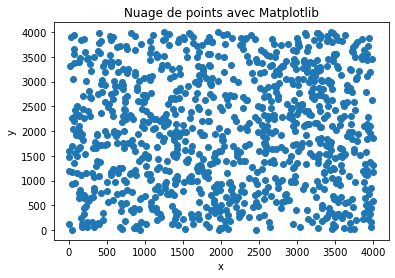

In [5]:
# @author : corentin, antonin
import matplotlib.pyplot as plt
import json
import os
import math
from pprint import pprint

ville = None

nom_fichier = input("Veuillez mettre le nom du fichier json a importer\n") + ".json"
#import du JSON de la ville
path_fichier = os.path.join("json_generate",nom_fichier)
with open(path_fichier, "r") as f : 
    ville = json.load(f)

coor_x = []
coor_y = []

def create_matrice(ville):

    matrice_adjacence = []

    for ville_a in ville.items():
        element_matrice = []
        
        x_a =  ville_a[1]['position'][0]
        coor_x.append(x_a)
        y_a = ville_a[1]['position'][1]
        coor_y.append(y_a)
        nom_ville_a = str(ville_a[1]['nom_ville'])

        for ville_b in ville.items():
           x_b = ville_b[1]['position'][0]
           y_b = ville_b[1]['position'][1]
           nom_ville_b = str(ville_b[1]['nom_ville'])

           if nom_ville_a == nom_ville_b:
               element_matrice.append(0)

           else:
               element_matrice.append(math.sqrt(math.pow(x_b - x_a, 2) + math.pow(y_b - y_a, 2)))

        matrice_adjacence.append(element_matrice)
    return matrice_adjacence


matrice = create_matrice(ville)


plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(coor_x, coor_y)
plt.show()

## <center>III - Modélisation du problème <center>

### <center>1 - Complexité théorique <center>

Le cas de la complexité du VRP s’approche de la complexité du voyageur de commerce.
Or cette dernière s’apparente à deux problèmes :
- <u>Le problème décisionnel :</u> peut-on effectuer un cycle remplissant les conditions de parcours ? (distance < k)
- <u>Le problème de recherche de solution :</u> renvoyer une solution de parcours spécifique

Le **VRP** quant à lui cherche à faire une **vérification d’un chemin optimisé parmi les solutions possibles** pour les différents parcours.
C’est une comparaison directe effectuable par une opération simple linéaire qui en elle-même ne complexifie pas la solution au-delà d’une approche polynomiale (simplement trouver le plus haut élément K parmi une liste de taille n, donc une complexité minimale associé au tri-simplifié).
Donc on peut apparenter la **complexité du VRP** à la classe de **complexité du problème du voyageur de commerce** tant que cette classe à une **complexité supérieur à P**.   

                                                                                                                      
La logique étant la suivante
O de VRP= $O(Voyageur\ de\ commerce) + O(tri\ simplifie)$  
O (tri simplifié) s’apparente à $O(n)$ (ou moins) dans $P$, si $O(VdC)$ est dans NP alors P est un sous-ensemble de NP, donc la complexité passe en NP (ensemble global).
                                                                                                              
![ouaisimage](https://lh3.googleusercontent.com/IRabtwtwye7lixV70oZFAQ4_O0ISK-0Hf3p-N16vXshfV3z9SZh_VO_572l7PPitVD00kYM=s102)

De même alors $O(tri\ simplifie) / O(VDC) -> 0$ en l’infini, donc $O(VRP)= O(tri\ simplifie)+ O(voyageur\ de\ commerce)~= O (VdC)$

<br/><br/>

Pour prouver la complexité du voyageur de commerce nous allons procéder de deux manières, **en premier par référence**, puis par une **vérification mathématique**.  
 
<u>Par référence :</u>

La complexité du voyageur de commerce est désigné comme NP-complet pour son problème décisionnelle, qui est de renvoyer un parcours.  
Il a été démontré tel quel par Richard Karp parmi les 21 problèmes NP-complets de Karp.  
Or la partie décisionnelle est la partie avec la plus faible complexité, car on cherche l’existence d’un parcours quelconque vérifiant VDC. 
***Ainsi notre borne inférieur (complexité minimale du problème) est au moins NP complet.***

Nous allons par une approche mathématique déterminer que le problème n’est pas $NEXP$, ce qui nous permettra de créer une borne supérieure. 
Nous allons également vérifier que le problème n’est pas P :

1)	La vérification et génération d’un cycle hamiltonien change d’exécution en exécution.
    
**Le problème n’est donc pas déterministe, ce qui est nécessaire pour être de complexité P**

2)	Pour vérifier si un problème est dans NP, on doit vérifier :
1. qu’il existe un certificat quantifiable et limité par les variables de décisions du problème
2. que l’on peut approcher la complexité de la résolution dans le pire des cas, par un polynôme

<u>Vérification du certificat (espace utilisé) :</u>
    
On remarque que le problème, pour une variable « nombre de villes » de taille n, renvoie une liste de villes de tailles n (notre parcours a une taille n), ainsi **notre certificat est bien réel et limité**. 

<u>Calcul de la solution</u>
    
- Via hiérarchisation 
    
Instant initial :
On a N villes possibles à choisir, soit n choix possibles à parcourir.
On a donc **N pour la complexité de l’instant initial**

- Instant K/étape K

    
A l’étape K, il nous reste N-k ville à parcourir (pour $N-K>1$). Or, on parcourt les N-k villes possible parmi le nombre de parcours précédent, après avoir voyagé vers la nouvelle ville, car on ne peut pas repasser par la même ville, **ce qui nous enlève 1 choix possible**. 
A l’étape $K+1$, on a $N-(k+1)$ choix possible parmi les parcours restants, ce qui prouve notre hiérarchisation.
**L’instant final est déterminé par la situation** où il ne reste plus qu’une ville à parcourir avant de revenir à la case départ.


- Opérations du programme

Donc le programme s’avère effectuer n opération à l’instant $T0$, puis $n-1$ à l’instant suivant, on se retrouve donc avec $n*(n-1)*…*(n-k)*(n-(k+1)*…*1*1$, soit $n!$, on a donc une complexité en $O(n!)$  pour le nombre de parcours effectués, tout cela en présumant que la complexité de prendre 1 parcours parmi 1 choix est $O(1)$, dans le cas contraire, si il y a une complexité supérieure tel que $O(m)$, **la complexité est dès lors $O(n!*m)$**, m étant déterminé par les complexités des contraintes, ici supposé polynomiales.  
Le problème peut également s’apparenter un polynôme de $n^n-k*n^(n-1)+…-j*n$
Soit un polynôme dont le degré maximal est n et qui peut s’écrire $N^n-(N-1)!$
Donc le critère numéro 2 est vérifié.
    
    Simplification
De par la nature des parcours, le premier point de départ, avec n choix possible parmi n villes, néanmoins le choix est fait parmi n villes au hasard, c’est le point de départ donc aucun parcours n’est effectué vers le point de départ.  
Les parcours donc démarre à la deuxième étape, donc on passe de $\prod_{(i=0)}^{(n-1)}n-i$   à $\prod_{(i=1)}^{(n-1)}n-i$
Soit une complexité en $O(n!)$ à $O(n-1!)$.

Différence entre VRP et voyageur de commerce

Le voyageur de commerce définit ses parcours de telle manière que le parcours d’une ville A>B>C>D>E>F>A est équivalent au parcours A>F>E>D>C>B>A (parcours inverse) donc théoriquement, la moitié des trajets peuvent être ignoré.  
Soit une complexité passant de $O(n-1 !)$ à $O(n-1 !/2)$, néanmoins en fonction des contraintes du parcours, le parcours inverse n’est pas équivalent en VRP, ainsi on laisse la complexité en $O(n-1!)$

<br/><br/>

<div style="color:red">
<strong> On a donc bien un programme donc la complexité maximale et minimale est NP complet, ainsi notre complexité est NP complet. </strong>
    </div>
<br/><br/>

## <center>IV - Modélisation algorithmique <center>
    


### <center> 1 - Définition de l'algorithme génétique </center>

Pour le choix de l'algorithme, nous avons décidé de prendre le génétique avec les paramètres suivant :

<u>Gène :</u> une ville ; <br/>
<u>Chromosome :</u> itinéraire satisfaisant ; <br/>
<u>Population :</u> ensemble d'itinéraire possible ; <br/>
<u>Parent :</u> 2 itinéraires combinés ;<br/>
<u>Pool d'accouplement :</u> collection de parent à reproduire ; <br/>
<u>Fitness :</u> fonction qui indique la qualité de l'itinéraire ; <br/>
<u>Mutation :</u> variation de gène dans la population ; <br/>
<u>Elitisme :</u> moyen de transporter un individu dans la prochaine génération. <br/><br/>

Et poursuivant les étapes ci-dessous :<br/>

    1- créer une population
    2- Déterminer une aptitude (fitness)
    3- Sélectionner un pool d'accouplement
    4- Accoupler
    5- Muter (en fonction des cas)
    6- répéter jusqu'à la solution globale
<br/>

<u>Pourquoi choisir l'algorithme génétique ?</u>

Tout d'abord l'algorithme génétique est un algortihme évolutionnistes, l'idée est de faire évoluer un ensemble de solutions à un problème donné, dans l'optique de trouver les meilleurs résultats. Ce qui est notre cas ici.

Afin de permettre la résolution du problème, l'algorithme génétique se base sur la théorie de Friedlin et Wentzell des perturbations stochastiques des systèmes dynamiques. La démonstration de Cerf montre d'ailleurs que le processus de convergence dépend essentiellement de la mutation.

De manière globale, on commence avec une population de base qui se compose le plus souvent de chaînes de caractères correspondant chacune à un chromosome.

Le contenu de cette population initiale est généré aléatoirement. On attribue à chacune des solutions une note qui correspond à son adaptation au problème. Ensuite, on effectue une sélection au sein de cette population.


Ensuite dans notre problème, la méthode de mutation ne devrait être capable de mélanger l'itinéraire, elle ne devrait jamais ajouter ou supprimer un emplacement de l'itinéraire, sinon elle risquerait de créer une solution invalide.

Enfin, les performances des algorithmes génétiques par rapport aux algorithmes classiques sont plus marquées lorsque les espaces de recherches sont importants, puis lorsque l'on préfère avoir une solution relativement bonne rapidement plutôt qu'avoir la solution optimale en une durée indéfinie. C'est ainsi que les algorithmes génétiques sont utilisés.


### <center> 2 - Code python de l'algorithme génétique </center>



In [1]:
def grade_population(population):
    """ Grade de la population. Retourne une liste de tuple (individu, fitness) trié par ordre décroissant de grade. """
    individus_grades = []
    for individu in population:
        individus_grades.append((individu, (individu.routeFitness)))
    return sorted(individus_grades, key=lambda x: x[1], reverse=True)

### <center> 3 - Contrainte rencontrée </center>

Nous possèdons un nombre de camions simultanément pour effectuer les livraisons. Le calcul de la tournée inclue l’affectation des objets aux différents camions disponibles, et nous oblige à minimiser le temps total, à la date de retour du dernier camion à la base.
- Capacité des camions (2 ou 3 dimensions) et encombrement des objets



### <center> 4 - étude de la complexité de l'algorithme génétique </center>

L'étude de la compléxité de l'algorithme génétique se découpe en l'étude de la compléxité de plusieurs de ses étapes car l'algorithme génétique repose sur 4 formes d'opération:<br/>

    1- une sélection de n gènes (villes) avec n possibilités pour une population n² 
    2- une étape de mutation entre génération de n gènes
    3- une étape de croisement entre 2 pools de n gènes
    4- une étape de sélection naturelle gènes
   
<br/>

Ainsi, on remarque la compléxité  $$ O(algorithme génétique)= O(population)+O(mutation)+O(croisement)+O(sélection naturelle)$$
<br/>
étudier la compléxité de l'algorithme revient donc à étudier la compléxité de ses membres. <br/><br/>

Complexité de la population<br/><br/>

La population est déterminé par le nombre d'arêtes entre N villes sans que l'ordre n'est d'importance.
La ou l'algorithme naïf ne calcul pas de la même manière un trajet A-B en fonction de sa position dans le parcours, pour l'algorithme génétique, la position dans le parcours n'influence pas cette étape là du calcul, les modification intervenant dans les autres étapes.
Ou se retrouve donc avec une population en $n²$ soit une complexité O(n²)<br/><br/>


Complexité de la mutation<br/><br/>

Cela revient à effectuer un test de mutation linéaire sur les n gênes possibles,
la complexité est donc $O(n)$<br/><br/>


Complexité du croisement<br/><br/>

On effectue un seul croisement simple entre 2 ensembles de n gênes, ce qui revient à faire intervenir 2n gènes.
On a donc une complexité en $O(2n)$<br/><br/>

Complexité de la sélection<br/><br/>

Cela revient à effectuer un test de sélection naturelle linéaire sur les n gênes présent,
la complexité est donc $O(n)$<br/><br/>


Notre compléxité vaut donc: 
$$O(algorithme génétique)=O(population)+O(mutation)+O(croisement)+O(sélection naturelle)=O(n²)+O(n)+O(2n)+O(n)$$
<br/><br/>

Simplification<br/><br/>

$n²/n= n$, donc n²/n tends vers l'infini pour n tendant vers l'infini, on peut donc considérer n²>>>>n, de même pour n²>>>>$k*n$ avec k une constante, 
Soit O(n²)>>>>O($n*k$) donc $$O(n²)+O(n)+O(2n)+O(n)=O(n²)$$

<br/><br/>
Pour aller plus loin, une méthode d'algorithme génétique par sharing permet de faire converger simultanément sur un ensemble d'optimum plutôt que se concentrer sur une approche optimale, bien que non implémenté dans notre problème elle permet de réduire notre compléxité O(n²) en O(n log(n)).

## <center>V - Etude statistique <center>

Nous allons observer les statistiques du trafic mis à disposition sur la base de données.
Nous allons nous en servir pour calculer et comparer les espérances et variance du trafic en général et du trafic par arête.
<br>
L'espérance nous permettra d'avoir une idée du point de convergence/repartition du traffic lors de la journée
La variance quant à elle permet de comparer le niveau de dispersion des valeurs par rapport à cette espérance.

In [1]:
from pymongo import MongoClient
import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

client = MongoClient('localhost', 27017)
db = client['DataProject']
collection_trafic_stamped = db['vehicules_stamped']
vehicules_par_arete = list(db.vehicules_stamped.aggregate([
    {"$project":{"num_arete":1, "heures":{"$hour":"$datetime"}, "nb_vehicules":1}},
    {"$match":{"heures":{"$lte":24, "$gte":0}}},
    {"$group":{"_id":"$num_arete", 
               "nb_vehicules":{"$sum":"$nb_vehicules"}}},
    {"$sort":{"nb_vehicules":-1}}
]))

### <center> 1 répartion des arêtes </center>

Nous prenons en paramètres l'id des arêtes pour voir si notre ensemble d'arête semble réparti de manière équitablement aléatoire, en d'autres termes, que nos arêtes ne semble pas suivre un patern spécifique.
Pour 500 arêtes numéroté de 0 à 499, la valeur attendue est d'environ 249,5

In [116]:
nb_vehicule_total=0
for v in vehicules_par_arete:
    nb_vehicule_total+=v["nb_vehicules"]

Esperance_arete=0
for v in vehicules_par_arete:
    Esperance_arete+=(v["nb_vehicules"]/nb_vehicule_total)*v["_id"]
print(Esperance_arete)

249.40623487594996


Les arêtes semblent ne pas avoir un comportement particulier en vue de leur espérance, pour pousser l'étude de la répartition du trafic plus loin et la variation entre arêtes, nous allons étudier l'évolution par heure et par arêtes

### <center> 2 évolution en fonction de l'heure </center>

Nous regardons maintenant la répartition du trafic global par heure en calculant une probalité pour que un surplus de trafic arrive pour une heure h et ce en fonction du surplus de trafic par heure.<br/>

A cette fin nous allons prendre une liste de liste des arêtes en fonction des heures.

In [3]:
vehicules_par_heure_et_arete=[]
nb_vehicule_total=0
for h in range (24):
    temp = (list(db.vehicules_stamped.aggregate([
        {"$project":{"num_arete":1, "heures":{"$hour":"$datetime"}, "nb_vehicules":1}},
        {"$match":{"heures":{"$lte":h, "$gte":h}}},
        {"$group":{"_id":"$num_arete", 
                   "nb_vehicules":{"$sum":"$nb_vehicules"}}},
        {"$sort":{"_id":1}}
    ])))
    vehicules_par_heure_et_arete.append(temp)
    for v in temp:
        nb_vehicule_total+=v["nb_vehicules"]
print(vehicules_par_heure_et_arete)
print(nb_vehicule_total)

[[], [], [], [], [], [], [], [{'_id': 0, 'nb_vehicules': 13559}, {'_id': 1, 'nb_vehicules': 13295}, {'_id': 2, 'nb_vehicules': 14187}, {'_id': 3, 'nb_vehicules': 13678}, {'_id': 4, 'nb_vehicules': 13840}, {'_id': 5, 'nb_vehicules': 14192}, {'_id': 6, 'nb_vehicules': 14543}, {'_id': 7, 'nb_vehicules': 14769}, {'_id': 8, 'nb_vehicules': 15839}, {'_id': 9, 'nb_vehicules': 15526}, {'_id': 10, 'nb_vehicules': 13458}, {'_id': 11, 'nb_vehicules': 12889}, {'_id': 12, 'nb_vehicules': 13006}, {'_id': 13, 'nb_vehicules': 14039}, {'_id': 14, 'nb_vehicules': 14399}, {'_id': 15, 'nb_vehicules': 15560}, {'_id': 16, 'nb_vehicules': 14408}, {'_id': 17, 'nb_vehicules': 12460}, {'_id': 18, 'nb_vehicules': 13012}, {'_id': 19, 'nb_vehicules': 13578}, {'_id': 20, 'nb_vehicules': 14497}, {'_id': 21, 'nb_vehicules': 14111}, {'_id': 22, 'nb_vehicules': 12962}, {'_id': 23, 'nb_vehicules': 13992}, {'_id': 24, 'nb_vehicules': 14673}, {'_id': 25, 'nb_vehicules': 14958}, {'_id': 26, 'nb_vehicules': 13297}, {'_id': 

In [4]:
evolution_heure=[0]*24
total=0
for h in range (24):
    for v in vehicules_par_heure_et_arete[h]:
        total+=v["nb_vehicules"]

for h in range (24):
    for v in vehicules_par_heure_et_arete[h]:
        evolution_heure[h]+=(v["nb_vehicules"]/(total))

print(evolution_heure)

esperance_global_par_heure=0
h=0
for v in evolution_heure:
    esperance_global_par_heure+=v*h
    h+=1
print(esperance_global_par_heure)

esperance_matin_par_heure=0
m=0
for v in evolution_heure:
    if m<=12:
        esperance_matin_par_heure+=v*m
    m+=1
print(esperance_matin_par_heure)

esperance_soir_par_heure=0
s=0
for v in evolution_heure:
    if s>=12:
        esperance_soir_par_heure+=v*s
    s+=1
print(esperance_soir_par_heure)



[0, 0, 0, 0, 0, 0, 0, 0.14927287678895304, 0.26231933060750856, 0, 0, 0, 0, 0, 0, 0, 0, 0.35081323924436614, 0.23759455335917248, 0, 0, 0, 0, 0]
13.383991810002069
3.1434647823827397
10.24052702761933


Nous obtenons donc la répartition global du surplus de trafic (sur les heures de pointes), nous prenons également l'espérance pour avoir une heure moyenne, ce qui nous servira de point de comparaison.

In [5]:
evolution_heure_arete=[]
for a in range(500):
    temp=[]
    for h in vehicules_par_heure_et_arete:
        if len(h)!=0:
            temp.append(h[a]["nb_vehicules"])
        else:
            temp.append(0)
    evolution_heure_arete.append(temp)

nb_total_vehicule_par_arete=[]
for i in evolution_heure_arete:
    total=0
    for h in range(24):
        total+=i[h]
    nb_total_vehicule_par_arete.append(total)


In [7]:
evolution_heure_vehicule_par_arete=[]
id=0
for i in evolution_heure_arete:
    temp=[]
    for h in range(24):
        temp.append((i[h]/nb_total_vehicule_par_arete[id]))
    evolution_heure_vehicule_par_arete.append(temp)
    id+=1



In [8]:
esperance_par_arete_et_par_heure=[]
for i in evolution_heure_vehicule_par_arete:
    a=0
    for h in range(24):
        a+=i[h]*h
    esperance_par_arete_et_par_heure.append(a)
print(esperance_par_arete_et_par_heure)

esperance_par_arete_et_par_heure_matin=[]
for i in evolution_heure_vehicule_par_arete:
    a=0
    for h in range(24):
        if h<=12:
            a+=i[h]
    esperance_par_arete_et_par_heure_matin.append(a)
print(esperance_par_arete_et_par_heure_matin)


[13.3560093101989, 13.907516333218, 13.750702675079113, 13.663569255686951, 13.110154535375706, 13.5153347864796, 12.950174002495132, 13.327703682951967, 12.733378687612095, 12.896964671802515, 13.668325645804483, 13.624865363902138, 13.876169479999561, 13.615560571555251, 13.497279861345143, 13.334998851366873, 12.982148170187445, 13.456696417831454, 13.35053965819711, 13.430813927798152, 13.619208218248776, 13.51319530696667, 13.803558849984285, 13.37390258177798, 13.022723406065246, 13.077479155115235, 13.387780377046925, 13.366887223389467, 13.17913082337169, 13.53576988431131, 13.059940164976439, 13.606356043855328, 13.7110495016851, 13.230239594224823, 13.39882596685083, 13.10648769143177, 13.632883015173764, 12.821065023900621, 13.689727442684246, 13.436312687216155, 13.593197263079501, 13.379392443442432, 12.871468081154156, 13.032514304264904, 12.990213307796731, 12.936173596683929, 13.425604797534394, 13.425293805916644, 13.411762887553966, 13.200812490043013, 13.544590269492

On observe avec une espérance globale de 13.38, les espérance uniques des arêtes tourne autour de cette valeur, mais plus intéressant reste les cas éloignés pour voir les exceptions.<br/>

Ainsi avec 8 arête avec une espérance supérieur à 14 mais strictement inférieure à 14.2 , pour les espérance minimums on a 14 espérances compris entre 12.6 et 12.8 (12.6 étant le minimum), l'ensemble de nos arête suivent donc une répartition en courbe gaussienne.

In [15]:
esperance_par_arete_et_par_heure_matin=[]
for i in evolution_heure_vehicule_par_arete:
    a=0
    for h in range(24):
        if h<=12:
            a+=i[h]
    esperance_par_arete_et_par_heure_matin.append(a)
print(esperance_par_arete_et_par_heure_matin)

[0.41037758028871024, 0.35979891315409196, 0.37598521925427997, 0.3837640291952615, 0.43708849016901596, 0.39893981723104, 0.454157455842763, 0.4186718961049356, 0.4774259385243367, 0.4598018430277714, 0.3837656049894318, 0.3869056777965841, 0.36068792295964813, 0.3892359781535299, 0.4028308699629291, 0.4182460372157133, 0.45086889924735807, 0.40093102701662375, 0.4119410268028302, 0.4056272369758296, 0.39000823763143866, 0.39919524537830653, 0.36907355028880434, 0.4114803494396393, 0.44799242907575176, 0.4424660257147938, 0.4085707077656988, 0.41337138198124745, 0.4302424310132946, 0.3972487052431294, 0.4464686821957351, 0.3871366870209768, 0.37865748709122204, 0.4252185713332295, 0.4106069223269418, 0.44115915736246347, 0.3879686735193343, 0.46893934011955385, 0.3823182131260454, 0.40799111025219825, 0.38721839508471423, 0.412977143745627, 0.46329281129388455, 0.4472669723653776, 0.4514085470445242, 0.4581067782626415, 0.4099905311821169, 0.4077122104803766, 0.4089087180966708, 0.431

In [16]:
esperance_par_arete_et_par_heure_soir=[]
for i in evolution_heure_vehicule_par_arete:
    a=0
    b=0
    for h in range(24):
        if b>=12:
            a+=i[h]*h
        b+=1
    esperance_par_arete_et_par_heure_soir.append(a)
print(esperance_par_arete_et_par_heure_soir)

[10.232378802840081, 11.16442106120123, 10.882245415413646, 10.735467259154667, 9.770018327035771, 10.469049007869504, 9.476066449254745, 10.1260968313206, 9.077236275176778, 9.381504649551838, 10.738325541684453, 10.67127909788319, 11.133317977910128, 10.643140732380742, 10.413278128159453, 10.137969982387625, 9.533968065060002, 10.399126711092935, 10.206185447236647, 10.335789403914983, 10.639637544216699, 10.464478911117727, 10.99143882007434, 10.233714855520148, 9.594806686231976, 9.694236663981503, 10.271696252465484, 10.208807634816605, 9.894034186124456, 10.501236251157396, 9.642041272784624, 10.65372850481744, 10.82706875405815, 9.985573179684547, 10.262288755281118, 9.731816997500651, 10.672129221732746, 9.229354632458161, 10.768562432352653, 10.317277031597255, 10.646574194749581, 10.22740612609811, 9.32710367175084, 9.614880493446416, 9.534763803971503, 9.42595004025805, 10.289838658769796, 10.312613651713997, 10.288157772717437, 9.898359088736658, 10.50771736454368, 10.6325

Nous faisons la même observation en se concentrant uniquement sur les heures de pointes du matin, et ensuite une autre comparaison avec les heures de pointes du soir.
Nous observons à nouveau une répartition en courbes gaussiennes, (centré réduites).

### <center> 3 évolution de la variance globale et propres aux arêtes</center>
<br/><br/>

Nous faisons la même étude désormais sur la variance afin de comparer la dispersion globale vis à vis de celle de nos arêtes.

In [12]:
print("calcul de la variance")
print("liste des variances par aretes")
variance_arete=[]
for v in evolution_heure_vehicule_par_arete:
    temp=0
    for h in range(24):
        temp+=((h-esperance_global_par_heure)**2)*v[h]
    variance_arete.append(temp)
print(variance_arete)

print("Variance global")
variance_globale=0
for v in variance_arete:
    variance_globale+=v/500
print(variance_globale)

calcul de la variance
liste des variances par aretes
[23.199909108138208, 22.7059618785006, 22.954406048167257, 22.988930060394992, 23.523642025147645, 23.19893284918848, 23.794494178421978, 23.480948789600816, 24.186255081693254, 23.940521512638018, 22.990516538539847, 22.94604574985021, 22.675041919280858, 23.075352172963385, 23.26874850120241, 23.526097666223933, 23.75411586400947, 22.98834472180819, 23.1312703997637, 23.200235786807436, 23.15542783261875, 23.196565310833044, 22.78834629951213, 23.29175472262094, 23.77428203335962, 23.736915990189352, 23.1606585756358, 23.348925066556568, 23.480732590685516, 23.179419821411898, 23.90007083515181, 22.870603569761677, 22.98557767527481, 23.45410036363284, 23.351577952373614, 23.820433592276434, 23.134445568693472, 24.075081256983665, 22.981550390937507, 23.356247348783633, 22.902796700967983, 23.475174108533746, 24.025287484262215, 23.87917487041615, 23.810032184251856, 23.944253149717323, 23.433345395093898, 23.322924822806485, 23.29

Nous observons la même répartition au niveaux des variances que celle observés pour l'éspérance, 
On peut donc en déduire une répartition centré autour de deux pointes de traffic, ce qui permettrait pour pousser plus loins, de chercher à prouver qu nos arêtes suivent bien une loi normale centré réduite, ce qui est suggéré par la répartition des valeurs de l'espérance et des variances.